# Arrays und Grafiken speichern und lesen

## Text-Datein als Arrays lesen und schreiben

Numpy stellt Funktionen bereit, um Arrays aus CSV-artigen Dateien zu lesen und zu schreiben.

```python
numpy.savetxt(filename, arr, delimiter=' ', fmt='%.18e')
```

- `delimiter`: Trennzeichen zwischen den einzelnen Feldern.
- `fmt`: Format, in dem die Array-Elemente geschrieben werden. Standard ist Exponential-Notation mit 18 Nachkommastellen.

In [1]:
from numpy import savetxt, cos, ogrid

In [1]:
x, y = ogrid[0:1:10j, 0:1:3j]
a = cos(x - y)
a

array([[ 1.        ,  0.87758256,  0.54030231],
       [ 0.99383351,  0.92533092,  0.63027505],
       [ 0.97541009,  0.96166719,  0.71247462],
       [ 0.94495695,  0.98614323,  0.78588726],
       [ 0.90284967,  0.99845719,  0.84960756],
       [ 0.84960756,  0.99845719,  0.90284967],
       [ 0.78588726,  0.98614323,  0.94495695],
       [ 0.71247462,  0.96166719,  0.97541009],
       [ 0.63027505,  0.92533092,  0.99383351],
       [ 0.54030231,  0.87758256,  1.        ]])

In [1]:
savetxt('array.txt', a)

In [1]:
with open('array.txt', 'r') as f:
    print(f.read())

1.000000000000000000e+00 8.775825618903727587e-01 5.403023058681397650e-01
9.938335085388919632e-01 9.253309204112923902e-01 6.302750509229451126e-01
9.754100853894475120e-01 9.616671884933809533e-01 7.124746245384189214e-01
9.449569463147377002e-01 9.861432315629250489e-01 7.858872607769479268e-01
9.028496693588986544e-01 9.984571869987445281e-01 8.496075628495277643e-01
8.496075628495277643e-01 9.984571869987445281e-01 9.028496693588986544e-01
7.858872607769480378e-01 9.861432315629250489e-01 9.449569463147377002e-01
7.124746245384189214e-01 9.616671884933809533e-01 9.754100853894475120e-01
6.302750509229451126e-01 9.253309204112923902e-01 9.938335085388919632e-01
5.403023058681397650e-01 8.775825618903727587e-01 1.000000000000000000e+00



Für **C**SV-Dateien muss `delimiter` (Trennzeichen) gesetzt werden:

In [1]:
savetxt('array.txt', a, delimiter=',')

In [1]:
with open('array.txt', 'r') as f:
    print(f.read())

1.000000000000000000e+00,8.775825618903727587e-01,5.403023058681397650e-01
9.938335085388919632e-01,9.253309204112923902e-01,6.302750509229451126e-01
9.754100853894475120e-01,9.616671884933809533e-01,7.124746245384189214e-01
9.449569463147377002e-01,9.861432315629250489e-01,7.858872607769479268e-01
9.028496693588986544e-01,9.984571869987445281e-01,8.496075628495277643e-01
8.496075628495277643e-01,9.984571869987445281e-01,9.028496693588986544e-01
7.858872607769480378e-01,9.861432315629250489e-01,9.449569463147377002e-01
7.124746245384189214e-01,9.616671884933809533e-01,9.754100853894475120e-01
6.302750509229451126e-01,9.253309204112923902e-01,9.938335085388919632e-01
5.403023058681397650e-01,8.775825618903727587e-01,1.000000000000000000e+00



#### Laden von CSV-Dateien

Laden von CSV-Dateien in Variablen

```python
numpy.loadtxt(filename, delimiter=None, skiprows=0, comments='#')
```

- `delimiter`: Trennzeichen zwischen den einzelnen Feldern. `None` bedeutet, dass alle *Whitespace*-Zeichen als Trennzeichen funktionieren.
- `skiprows`: Anzahl an Zeilen, die am Anfang übersprungen wird (falls die Datei z.B. Zusatzinformationen am Anfang enthält).
- `comments`: Zeichen, mit dem in der Datei Kommentare beginnen. Diese werden beim Einlesen übersprungen.

In [1]:
from numpy import loadtxt
loadtxt('array.txt', delimiter=',')

array([[ 1.        ,  0.87758256,  0.54030231],
       [ 0.99383351,  0.92533092,  0.63027505],
       [ 0.97541009,  0.96166719,  0.71247462],
       [ 0.94495695,  0.98614323,  0.78588726],
       [ 0.90284967,  0.99845719,  0.84960756],
       [ 0.84960756,  0.99845719,  0.90284967],
       [ 0.78588726,  0.98614323,  0.94495695],
       [ 0.71247462,  0.96166719,  0.97541009],
       [ 0.63027505,  0.92533092,  0.99383351],
       [ 0.54030231,  0.87758256,  1.        ]])

## Numpy's eigenes Datei-Format
```python
numpy.load(filename)
numpy.save(filename, arr)
numpy.savez(filename, *args, **kwds)
```

Numpy hat ein eigenes Datei-Format zum Speichern von Arrays. Dateien haben die Endung `.npy` oder `.npz`. `numpy.save` speichert ein einzelnes Array in eine `.npy`-Datei, `numpy.savez` speichert eine beliebige Anzahl von Arrays in einer `.npz`-Datei. Der Vorteil ist, dass diese Dateien weniger Platz in Anspruch nehmen, dafür sind sie aber weniger kompatibel (numpy muss sie lesen).

In [1]:
from numpy import load, save, savez, array

a = array([1, 2, 3])
b = array([4, 5, 6])

In [1]:
save('a.npy', a)
load('a.npy')

array([1, 2, 3])

In [1]:
savez('ab.npz', a, b)
ab = load('ab.npz')

`ab` lässt sich verwenden wie ein Dictionary. Die gespeicherten Arrays sind standardmäßig als `arr_0`, `arr_1`, etc verfügbar.

In [1]:
ab.items()

[('arr_0', array([1, 2, 3])), ('arr_1', array([4, 5, 6]))]

In [1]:
ab['arr_0']

array([1, 2, 3])

Verwendet man beim Speichern benannte Argumente, werden die Arrays unter dem entsprechenden Namen gespeichert:

In [1]:
savez('ab.npz', a=a, b=b)
ab = load('ab.npz')
ab.items()

[('b', array([4, 5, 6])), ('a', array([1, 2, 3]))]

### `.mat`-Dateien (Kompatibilität)

Mit SciPy kann man auch Matlab-kompatible `.mat`-Dateien laden und speichern:
```python
scipy.io.loadmat(filename)
scipy.io.savemat(filename, dictionary)
```
Für Details sei hier auf die Dokumentation verwiesen.

## Arrays als Bilder

Arrays können auch als Bild-Dateien (`png`, `jpg`, ...) gespeichert und geladen werden.

```python
scipy.misc.imread(file_or_name, flatten=False, mode=None)
scipy.misc.imsave(file_or_name, arr, format=None)
```

- `flatten=True`: rechnet das Bild in Grausstufen um, d.h. pro Pixel wird nur ein einzelner Wert verwendet. Die Umrechnung ist so modelliert, dass die wahrgenommene Farbintensität möglichst erhalten bleibt; das Verfahren ist also von physiologischen Modellen abhängig.

- `format`: Beim Speichern kann über `format` das Datei-Format festgelegt werden. Meist kann man `format=None` lassen, wodurch das Format aus dem Dateinamen bestimmt wird.

Bilder, sofern sie nicht als Graustufen-Bilder gespeichert sind, haben mehr als einen Wert pro Pixel zum Kodieren der Farb-Information. Farbkodierungen sind sehr vielfältig und komplex. Beim Laden kann man über `mode` die gewünschte Farbkodierung festlegen, `None` wählt dieselbe Kodierung, die in der Datei verwendet wird.

Ein Bild mit $nx \times ny$ Pixeln wird als `(ny, nx)`- (bei Graustufen) oder `(ny, nx, nc)`-Array geladen, wobei `nc` abhängig von der Farbkodierung ist, meist 3 oder 4. Die linke obere Ecke des Bildes hat Koordinaten `[0, 0]`. Das und die Vertauschung der Achsen sorgt dafür, dass ein Array-Plot das richtige Bild reproduziert.


In [1]:
from scipy.misc import imread, imsave
import matplotlib.pyplot as plt

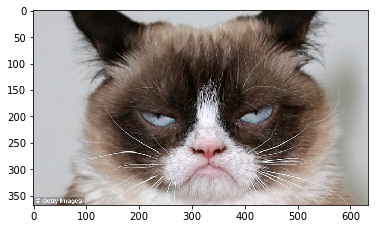

In [1]:
image = imread('../images/grumpy.jpg')
plt.imshow(image)
plt.show()

In [1]:
image.shape

(368, 634, 3)

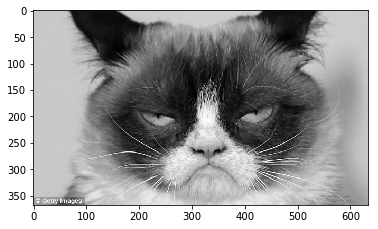

In [1]:
image = imread('../images/grumpy.jpg', flatten=True)
plt.imshow(image, cmap='gray')
plt.show()

Hier der Versuch ein Bild mit Grauwerten in einer Farbskala darzustellen.. 

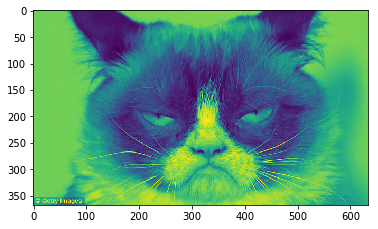

In [1]:
plt.imshow(image)
plt.show()

In [1]:
image.shape

(368, 634)

In [1]:
imsave('grumpy-grayscale.png', image)

Einmal geladenen Bilder lassen sich programmatisch bearbeiten wie jedes andere Array; so lassen sich z.B. beliebige Bildverarbeitungs-Filter implementieren.

*Beispiel*: (pseudo-) Gradient (einfacher Differenzenquotient bis auf Skalierung) im Bild.

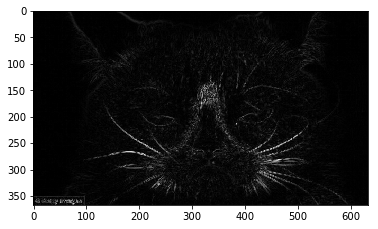

In [1]:
from numpy import sqrt

def gradient(img):
    gx = img[:-1, :-1] - img[1:, :-1]
    gy = img[:-1, :-1] - img[:-1, 1:]
    grad = sqrt(gx**2 + gy**2)
    return grad

grad = gradient(image)
plt.imshow(grad, cmap='gray')
plt.show()

*Beispiel*: Maximum über ein Gebiet (Verschmieren, dilate)

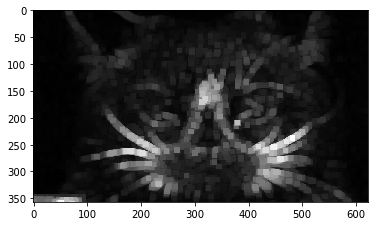

In [1]:
from numpy import empty, max as amax
# `max as amax` vermeidet Namens-Kollision mit Standard-Funktion `max`

def dilate(img, winsize):
    sizex, sizey = img.shape
    windows = empty((sizex-winsize, sizey-winsize, winsize, winsize))
    for i in range(winsize):
        for j in range(winsize):
            windows[:, :, i, j] = img[i:-(winsize-i), j:-(winsize-j)]
    dilation = amax(windows, axis=(2, 3))
    return dilation

dilation = dilate(grad, 10)
plt.imshow(dilation, cmap='gray')
plt.show()

# Plots exportieren

```python
matplotlib.pyplot.savefig(filename)
```

`savefig` speichert die *aktuelle* Figure unter dem gegebenen Dateinamen.

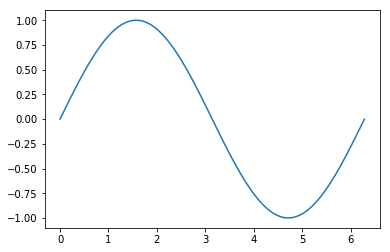

In [1]:
from numpy import sin, pi, ogrid
import matplotlib.pyplot as plt

x = ogrid[0:2*pi:100j]
plt.plot(x, sin(x))


plt.savefig('plot.png')
plt.show()


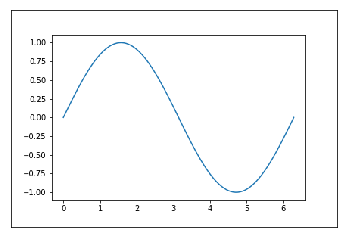

In [1]:
from scipy.misc import imread

plt.imshow(imread('plot.png'))
plt.xticks([])
plt.yticks([])
plt.show()

## Videos

```python
matplotlib.animation.FuncAnimation(fig, func, frames=None, interval=, fargs=None)
```

`FuncAnimation` erzeugt eine Animation, indem die als `func` übergebene Funktion
`frames`-mal aufgerufen wird. Die Funktion kriegt bei jedem Aufruf den Index des
aktuellen Frames als ersten Parameter übergeben, und optional die Elemente von
`fargs` (ein Tupel) als weitere Parameter. Die Funktion sollte dann den Frame in
die aktuelle Figure ausgeben.

- `func`: Funktion(framse, *fargs)
- `frames`: Anzahl Bilder
- `fargs`: zusätzliche Argumente für func
- `interval`: Abstand der Bilder in Millisekunden.

Meist sollte die Funktion ausserdem `plt.clf()` zum leeren der Figure verwenden.

Die erzeugt Animation kann über die `save`-Methode als Video-Datei gepeichert
werden.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from numpy import ogrid, pi, sin

def plotsine(framenum, x, displacements):
    plt.clf()
    plt.plot(x, sin(x - displacements[framenum]), 'b')

x = ogrid[0:2*pi:100j]
displacements = ogrid[0:2*pi:30j]
anim = FuncAnimation(plt.figure(), plotsine,
                     frames=displacements.size,
                     interval=80,
                     fargs=(x, displacements))
anim.save('sine.mp4', writer='ffmpeg', extra_args=['-vcodec', 'h264'])